<a href="https://colab.research.google.com/github/biankaa/test/blob/master/imdb_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [0]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [0]:
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
  return " ".join([reverse_word_index.get(i, "?") for i in text])

In [0]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value = word_index["<PAD>"],
                                                        padding = "post",
                                                        maxlen = 256)

In [0]:
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value = word_index["<PAD>"],
                                                      padding = "post",
                                                      maxlen = 256)

In [0]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = tf.nn.relu))
model.add(keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["acc"])

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [0]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 40,
                   batch_size = 512,
                   validation_data = (x_val, y_val),
                   verbose = 1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 100us/sample - loss: 0.6922 - acc: 0.5055 - val_loss: 0.6903 - val_acc: 0.5195
Epoch 2/40
15000/15000 [==============================] - 1s 59us/sample - loss: 0.6874 - acc: 0.5619 - val_loss: 0.6833 - val_acc: 0.6474
Epoch 3/40
15000/15000 [==============================] - 1s 55us/sample - loss: 0.6759 - acc: 0.6941 - val_loss: 0.6685 - val_acc: 0.7177
Epoch 4/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.6558 - acc: 0.7487 - val_loss: 0.6457 - val_acc: 0.7186
Epoch 5/40
15000/15000 [==============================] - 1s 55us/sample - loss: 0.6268 - acc: 0.7714 - val_loss: 0.6151 - val_acc: 0.7617
Epoch 6/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.5900 - acc: 0.7978 - val_loss: 0.5790 - val_acc: 0.8037
Epoch 7/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.5478 - acc: 0.8249 - val_loss: 0

In [0]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 45us/sample - loss: 0.3224 - acc: 0.8736
[0.3224385715007782, 0.87356]


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [0]:
import matplotlib.pyplot as plt

acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

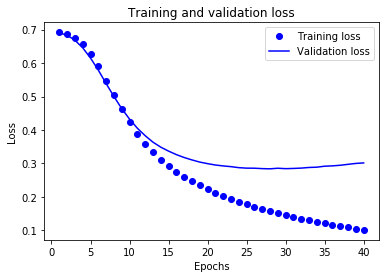

In [0]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

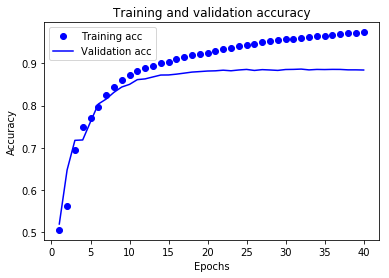

In [0]:
plt.clf()

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()